# Régression linéaire simple

## 1) Implémentation du modèle de régression linéaire

In [1]:
import pandas as pd
from matplotlib import pyplot as pp
import numpy as np

In [2]:
data = pd.read_csv("./data/reg_simple.csv")
data.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
#Détermination de notre nombre d'exemples (de lignes dans notre dataset) :
m = len(data)
m

27

Text(0, 0.5, 'note')

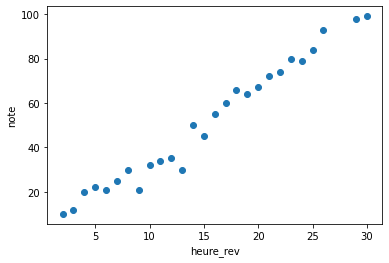

In [4]:
pp.scatter(data["heure_rev"],data["note"])
pp.xlabel("heure_rev")
pp.ylabel("note")

## Méthode normale 

In [5]:
x = np.array(data["heure_rev"])
x = np.expand_dims(x, 0)
x = np.transpose(x)
print(x.shape)

(27, 1)


In [6]:
y = np.array(data["note"])
y = np.expand_dims(y, 0)
y = np.transpose(y)
print(y.shape)

(27, 1)


In [7]:
biais = np.ones_like(y)
print(biais.shape)

(27, 1)


In [8]:
X = np.concatenate((x,biais),axis = 1)
X.shape
print(X.shape)

(27, 2)


In [9]:
theta = np.random.randn(2,1)
print(theta.shape)
theta

(2, 1)


array([[-0.51673376],
       [-0.20704572]])

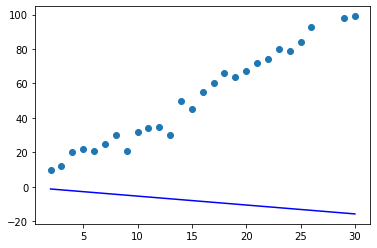

In [10]:
def reg_lin (X, theta):
    y_modele = X.dot(theta)
    return y_modele

y_modele1 = reg_lin(X, theta)

pp.scatter(data["heure_rev"],data["note"])
pp.plot(data["heure_rev"], y_modele1, color = "blue")

In [11]:
fonc_cout = (1/2*m) * np.sum((y_modele1 - y )**2)
fonc_cout

1629725.3722975594

In [12]:
def grad (X, model, theta, y):
    grad = (1/m) * (X.T).dot(model(X, theta) - y)
    return grad

In [13]:
def desc_grad (X, y, theta, model, alpha, nb_iter, grad):
    
    cout_evolution = []
    
    for i in range(0, nb_iter):
    
        theta = theta - (alpha*grad(X, model, theta, y))
        
        #Ajout de la fonction coût de l'itération en cours à la liste pour en conserver un historique.
        cout_evolution.append((1/2*m) * np.sum((np.dot(X,theta) - y )**2))
    
    return theta, cout_evolution


nb_iter = 100
theta, cout_evolution = desc_grad(X, y, theta, reg_lin, 0.001, nb_iter, grad)
y_modele1 = np.dot(X,theta)

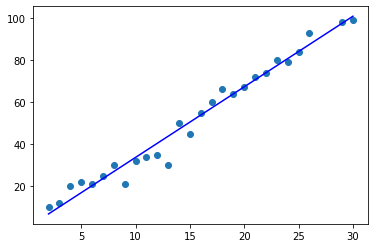

In [14]:
pp.scatter(data["heure_rev"],data["note"])
pp.plot(x, y_modele1, color = "blue")

Pour juger de notre modèle avec un meilleur critère que la fonction coût, on peut établir le coefficient de détermination R2.

Il représente la part de la variabilité de y qui est expliquée par notre modèle.

Dans un cas de régression linéaire, R2 est toujours compris entre 0 et 1 (0 et 100%).

PS : R2 n'est PAS un carré, dans certains cas, il peut être négatif (si on essaie d'appliquer un modèle pas du tout adapté à des données et qui les explique moins bien que la droite d'hypothèse nulle).

In [15]:
coef_r2 = 1-((y-y_modele1)**2).sum()/((y-y.mean())**2).sum()

coef_r2

0.9732656778083587

Notre modèle explique une part de 97% de la variabilité de y.

Conclusion : notre modèle semble bien ajusté aux données.

Text(0.5, 1.0, 'Evolution du coût du modèle dans le temps')

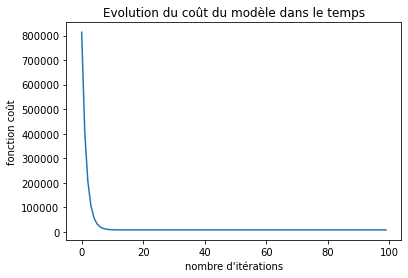

In [16]:
pp.plot(range(nb_iter), cout_evolution)
pp.xlabel("nombre d'itérations")
pp.ylabel("fonction coût")
pp.title("Evolution du coût du modèle dans le temps")

A en juger par l'asymptote bien visible, on aurait probablement pu déjà obtenir un bon modèle avec cet algorithme à partir de moins itérations.

## Méthode scikitlearn

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_

#Prédictions avec la méthode scikit learn :
y_modele2 = lin_reg.predict(X)

## 2) Evaluation du modèle

Modèle 1 (méthode normale):

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_modele1)

19.816037031897643

Modèle 2 (méthode scikitlearn):

In [19]:
mean_squared_error(y, y_modele2)

19.775505697098875